In [1]:
import warnings
warnings.filterwarnings('ignore')

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from keras.preprocessing.sequence import pad_sequences

import sys
sys.path.append('../')

from src.attention import SelfAttention
from src.models import FBRNN,RNN
torch.manual_seed(1)

DATA_DIR = '../Data/'

Using TensorFlow backend.


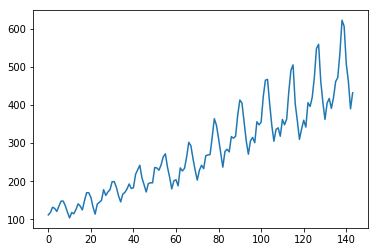

In [2]:
dataset = pd.read_csv(DATA_DIR+'international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [3]:
batch_size = 1

sample_batch = torch.tensor(dataset.values)
sample_batch = sample_batch.view(144,1,1).type(torch.float32)

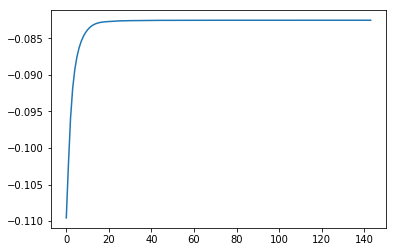

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [4]:
x = sample_batch[:-1]
y = sample_batch[1:]

model = FBRNN(embedding_dim=1, vocab_size=1000, hidden_size=16, num_layers=3, attention_hidden_size=10)
model = RNN(16,3,1,1)

model.eval()
y_ = model(sample_batch.type(torch.float32))
plt.plot(np.array(y_))
#plt.plot(np.array(sample_batch.detach()).squeeze())
plt.show()

opt = optim.SGD(list(model.parameters()), lr = 0.01, momentum=0.9)

model.train()
for epoch in range(100):
    #for batch in train_generator:
    model.zero_grad()
    outputs = model(sample_batch)
    outputs = torch.tensor(outputs[:-1]).view(143,1,1)
    loss = Variable(F.mse_loss(outputs, y),requires_
    #loss.backward()
    
    a = list(model.parameters())[0]
    
    loss.backward()
    opt.step()
    
    b = list(model.parameters())[0]
    if torch.equal(a.data, b.data):
        print('Not changing')
        break
    
    #opt.step()
    model.reset_hidden_states()

In [ ]:
model.eval()
y = model(sample_batch.type(torch.float32))
plt.plot(np.array(y))
#plt.plot(np.array(sample_batch.detach()).squeeze())
plt.show()